In [2]:
import os  
import zipfile  
import numpy as np  # linear algebra
import cv2  # Use OpenCV for faster image processing  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_curve, auc
from sklearn.preprocessing import label_binarize  
import matplotlib.pyplot as plt  
import seaborn as sns  
from tqdm import tqdm 

In [3]:
import os
import scipy.io
import csv

# Step 1: Load the labels from imagelabels.mat
mat_file_path = r"imagelabels.mat"
data = scipy.io.loadmat(mat_file_path)

# Assuming labels are stored in a variable called 'labels' in the .mat file
labels = data.get('labels')  # Replace 'labels' with the actual variable name in the .mat file
if labels is None:
    raise ValueError("Labels variable not found in the .mat file.")

labels = labels.flatten()  # Convert to a flat list if necessary

# Step 2: Get the list of .jpg files
image_folder = r"jpg"
images = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

if len(images) != len(labels):
    raise ValueError("Number of images and labels do not match.")

# Step 3: Create a CSV file
output_csv = "image_labels.csv"
with open(output_csv, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Filename', 'Label'])  # Header row

    for img, label in zip(images, labels):
        writer.writerow([img, label])

print(f"CSV file '{output_csv}' created successfully.")


CSV file 'image_labels.csv' created successfully.


Load Dataset

In [4]:
import pandas as pd
df = pd.read_csv("image_labels.csv")

Data Exploratory 

In [5]:
df.shape

(8189, 2)

In [6]:
df.head()

,Filename,Label
0,image_00001.jpg,77
1,image_00002.jpg,77
2,image_00003.jpg,77
3,image_00004.jpg,77
4,image_00005.jpg,77


In [7]:
# Step 2: Prepare the new DataFrame with the desired structure
# Initialize an empty list to store the rows for the new CSV
new_data = []

# For each row in the original CSV
for i, row in df.iterrows():
    label = row['Label']
    
    # Create a row with the label first, followed by a 28x28 grid flattened (784 values)
    grid = [0] * 784  # Initialize a list with 784 zeroes
    
    # Example logic: Just as a placeholder, we'll fill the grid with the label at the start
    # This part can be modified based on your specific logic to fill the grid
    grid[:len(str(label))] = [int(digit) for digit in str(label)]  # Fill grid with the label (as an example)

    # Combine label with the grid and append to new_data
    new_row = [label] + grid
    new_data.append(new_row)


In [8]:
# Step 3: Convert the new data into a DataFrame
columns = ['label'] + [f"{i//28+1}x{i%28+1}" for i in range(784)]
new_df = pd.DataFrame(new_data, columns=columns)

In [9]:
# Step 4: Save the new DataFrame to a CSV file
output_csv = "reshaped_image_labels.csv"
new_df.to_csv(output_csv, index=False)

print(f"New CSV file '{output_csv}' created successfully.")


New CSV file 'reshaped_image_labels.csv' created successfully.


In [10]:
train = pd.read_csv("reshaped_image_labels.csv")
print(train.shape)
train.head()

(8189, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,77,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

# Assuming 'train' is your full dataset containing both features and labels
# Split the data into training and testing sets
train, test = train_test_split(train, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Now, extract labels from both train and test sets
Y_train = train["label"]
Y_test = test["label"]

# Drop 'label' column from features
X_train = train.drop(labels=["label"], axis=1)
X_test = test.drop(labels=["label"], axis=1)

print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)


X_train shape is:  (6551, 784)
X_test shape is:  (1638, 784)


C:\Users\HP\AppData\Local\Temp\ipykernel_15368\701754767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette="icefire")


label
51    204
77    194
73    161
46    153
89    144
     ... 
27     32
34     32
35     31
25     29
24     28
Name: count, Length: 102, dtype: int64

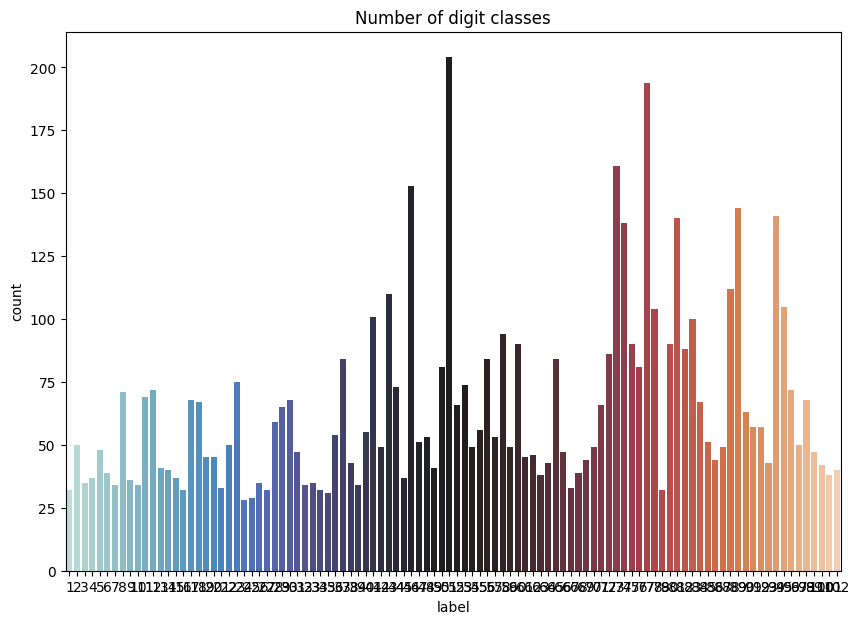

In [12]:
# visualize number of digits classes
plt.figure(figsize=(10,7))
sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [13]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (6551, 784)
x_test shape:  (1638, 784)


In [14]:
# Initialize the K-NN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)

# Train the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Make predictions on the test set
Y_pred = knn.predict(X_test)

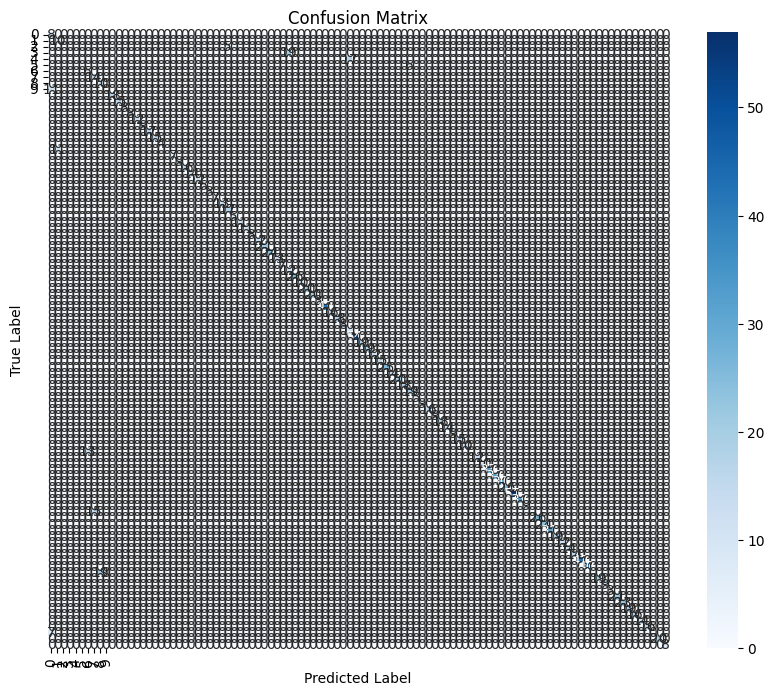

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [18]:
accuracy_score(Y_test,Y_pred)

0.924908424908425

In [19]:
# Calculate ROC Curve and AUC
# Binarize the output
Y_test_bin = label_binarize(Y_test, classes=range(10))  # Assuming 10 classes (0-9)
Y_score = knn.predict_proba(X_test)  # Get probabilities for each class

In [21]:
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    if Y_test_bin[:, i].sum() > 0:  # Check if there are positive samples
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        print(f"Class {i} has no positive samples in the test set.")

Class 0 has no positive samples in the test set.


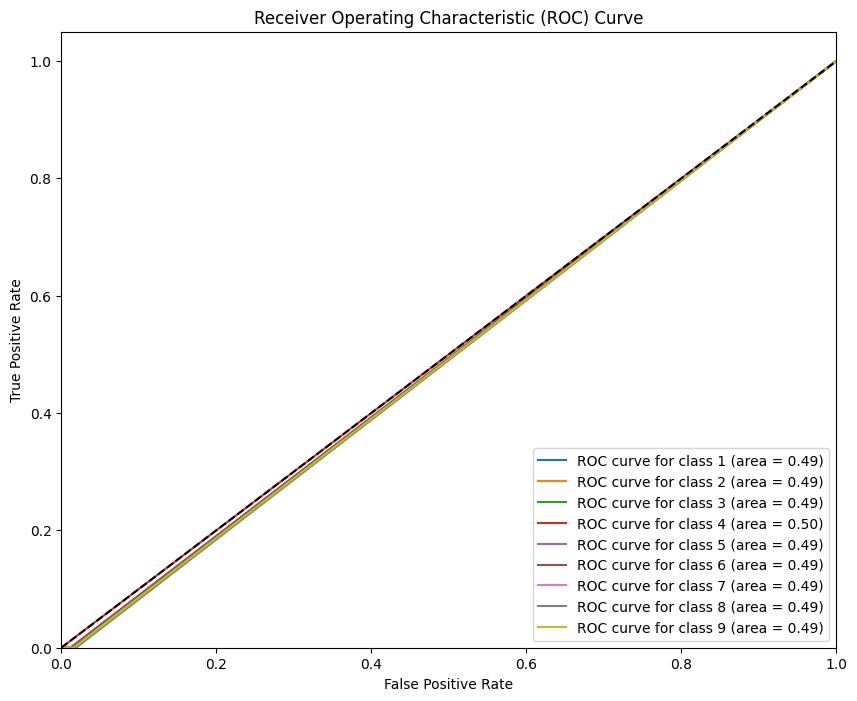

In [22]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for i in range(10):
    if i in roc_auc:  # Only plot if the class has AUC calculated
        plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
# Loss Curve (K-NN does not have a traditional loss function like other classifiers)
# However, we can visualize the accuracy over iterations or neighbors
neighbors = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracies.append(knn.score(X_train, Y_train))
    test_accuracies.append(knn.score(X_test, Y_test))

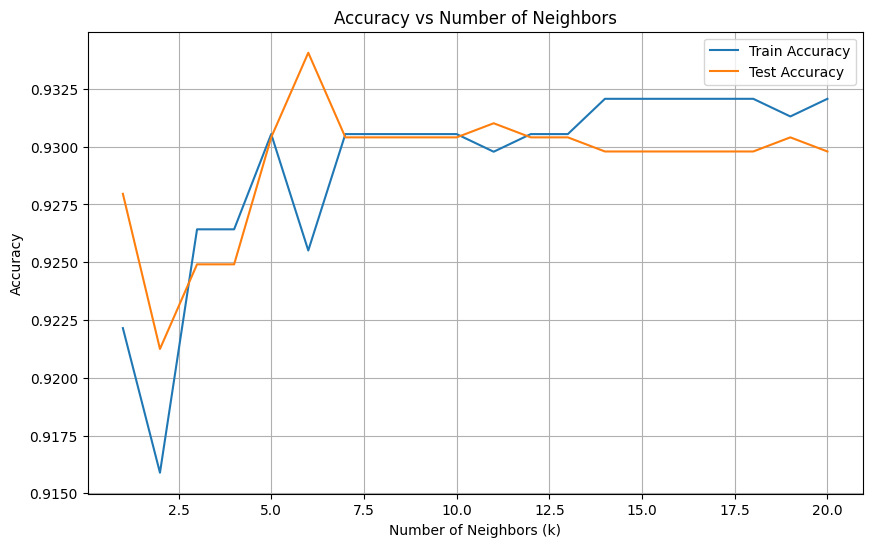

In [24]:
# Plotting the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Train Accuracy')
plt.plot(neighbors, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.legend()
plt.grid()
plt.show()